## 주제: 소나탐지

## 레포지토리: UC Irvine Machine Running Repository

## 데이터: Sonar, Mines vs. Rocks 데이터셋

## 알고리즘: 랜덤 포레스트

In [89]:
# 필요한 라이브러리 설치
!pip install ucimlrepo scikit-learn xgboost matplotlib seaborn

In [90]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo

In [91]:
data = fetch_ucirepo(id=151)
X = data.data.features
y = data.data.targets

print(f"특징 X 전체 모양: {X.shape}")
print(f"  값 y 전체 모양: {y.shape}")
print(f"         값 종류: {np.unique(y)}")

특징 X 전체 모양: (208, 60)
  값 y 전체 모양: (208, 1)
         값 종류: ['M' 'R']


## 값이 M인 데이터 중 하나
![로컬 이미지](./png/DataSet_M.png)

## 값이 R인 데이터 중 하나
![로컬 이미지](./png/DataSet_R.png)

## 데이터의 결과값인 M/R을 숫자형인 0/1로 변환

In [92]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

## 데이터를 학습/테스트 데이터로 분할

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## 랜덤 포레스트 모델 학습

In [94]:
rf_model = RandomForestClassifier(
    n_estimators = 220,   # 트리 개수
    max_depth = 25,   # 트리 깊이 제한
    min_samples_split = 10,   # 분할 최소 샘플 개수
    #min_samples_leaf = 5,   # 리프 노드 최소 샘플 개수
    max_features = 'sqrt',   # 각 트리가 사용할 특성 개수 (sqrt: 전체 특성의 제곱근 값)
    random_state = 42,
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_split=10,
                       n_estimators=220, random_state=42)

## 훈련/검증 정확도 계산 및 출력

In [95]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"훈련 정확도: {train_accuracy * 100:.2f}%")
print(f"검증 정확도: {test_accuracy * 100:.2f}%")

훈련 정확도: 100.00%
검증 정확도: 95.24%


## 훈련/검증 정확도 그래프 출력

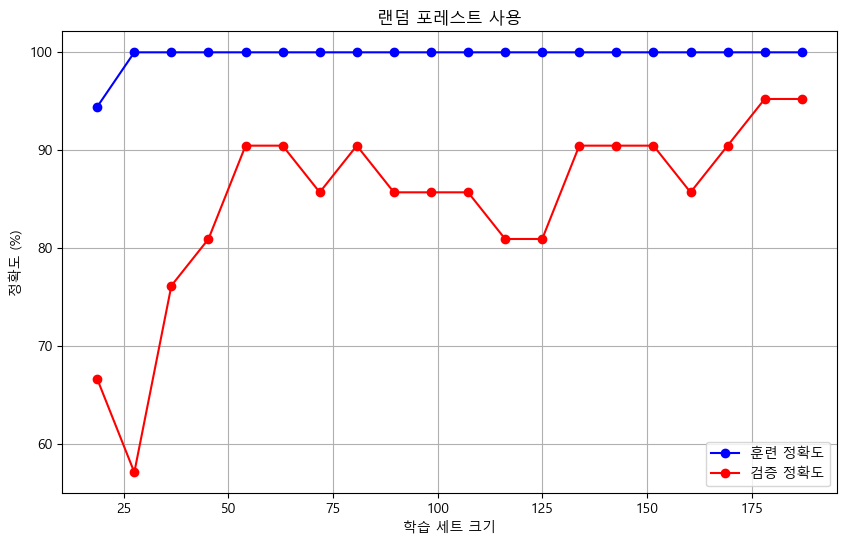

In [96]:
train_sizes = np.linspace(0.1, 1.0, 20) * len(X_train)
train_scores_fixed = []
test_scores_fixed = []

for size in train_sizes.astype(int):
    X_partial_train = X_train[:size]
    y_partial_train = y_train[:size]
    rf_model.fit(X_partial_train, y_partial_train)
    train_scores_fixed.append(rf_model.score(X_partial_train, y_partial_train) * 100)
    test_scores_fixed.append(rf_model.score(X_test, y_test) * 100)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_fixed, label='훈련 정확도', marker='o', color='blue')
plt.plot(train_sizes, test_scores_fixed, label='검증 정확도', marker='o', color='red')
plt.title('랜덤 포레스트 사용')
plt.xlabel('학습 세트 크기')
plt.ylabel('정확도 (%)')
plt.legend(loc='best')
plt.grid()
plt.show()

# 사용한 프롬프트
## 질문: 랜덤 포레스트 모델을 학습시킬 때, 검증 정확도를 높일 수 있는 인자들을 알려줘
![로컬 이미지](./png/ChatGPT_1.png)

![로컬 이미지](./png/ChatGPT_2.png)